# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [71]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [72]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df[pyber_data_df['type']=='Rural'].sum()


city            RandallchesterNorth HollyMichaelbergLake Latoy...
date            2019-04-13 11:13:312019-02-02 14:54:002019-03-...
fare                                                      4327.93
ride_id                                           580968240341287
driver_count                                                  537
type            RuralRuralRuralRuralRuralRuralRuralRuralRuralR...
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [73]:
#  1. Get the total rides for each city type
city_ridecount = pyber_data_df.groupby('type').count()['ride_id']
rural_ridecount = city_ridecount[0]
suburban_ridecount = city_ridecount[1]
urban_ridecount = city_ridecount[2]
city_ridecount

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [74]:
# 2. Get the total drivers for each city type
city_drivers = city_data_df.groupby('type')['driver_count'].sum()

rural_drivers = city_drivers[0]
suburban_drivers = city_drivers[1]
urban_drivers = city_drivers[2]

print(city_drivers)

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [75]:
print(pyber_data_df.head())

                 city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban  


In [76]:
#  3. Get the total amount of fares for each city type
city_fares = pyber_data_df.groupby('type').sum()['fare']
rural_fares = city_fares[0]
suburban_fares = city_fares[1]
urban_fares = city_fares[2]

In [77]:
#  4. Get the average fare per ride for each city type. 
avg_fareride_series = city_fares/city_ridecount

rural_fareride_avg = avg_fareride_series[0]
suburban_fareride_avg = avg_fareride_series[1]
urban_fareride_avg = avg_fareride_series[2]



In [78]:
# 5. Get the average fare per driver for each city type. 
avg_faredriver_series = city_fares/city_drivers

print(city_fares)
print(city_drivers)

rural_faredriver_avg = avg_faredriver_series[0]
suburban_faredriver_avg = avg_faredriver_series[1]
urban_faredriver_avg = avg_faredriver_series[2]

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


In [79]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([city_ridecount, city_drivers, city_fares, avg_fareride_series, avg_faredriver_series], axis = 1)
pyber_summary_df.columns = ['Total Rides',"Total Drivers","Total Fares","Average Fare per Ride","Average Fare per Driver"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [80]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [81]:
#  8. Format the columns.
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,d}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,d}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [82]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [83]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
city_date_df = pyber_data_df.groupby(['type','date']).sum()['fare']
city_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [84]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

city_date_df = city_date_df.reset_index()


In [85]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_date_table = city_date_df.pivot(index = 'date', columns = 'type', values = 'fare')

In [86]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
city_date_2019 = city_date_table.loc['2019-01-01':'2019-04-29']
city_date_2019


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [87]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
city_date_2019.index = pd.to_datetime(city_date_2019.index)

In [88]:
# 7. Check that the datatype for the index is datetime using df.info()
city_date_2019.columns

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

In [89]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
city_date_2019_resampled = city_date_2019.resample('W').sum()

print(city_date_2019_resampled)

fare_by_week = city_date_2019_resampled

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93
2019-03-17  163.39    906.20  2044.42
2019-03-24  189.76   1122.20  2368.37
2019-03-31  199.42   1045.06  1942.77
2019-04-07  501.24   1010.73  2356.70
2019-04-14  269.79    784.82  2390.72
2019-04-21  214.14   1149.27  2303.80
2019-04-28  191.85   1357.75  2238.29


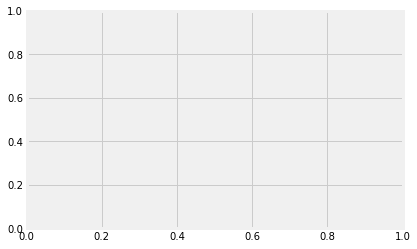

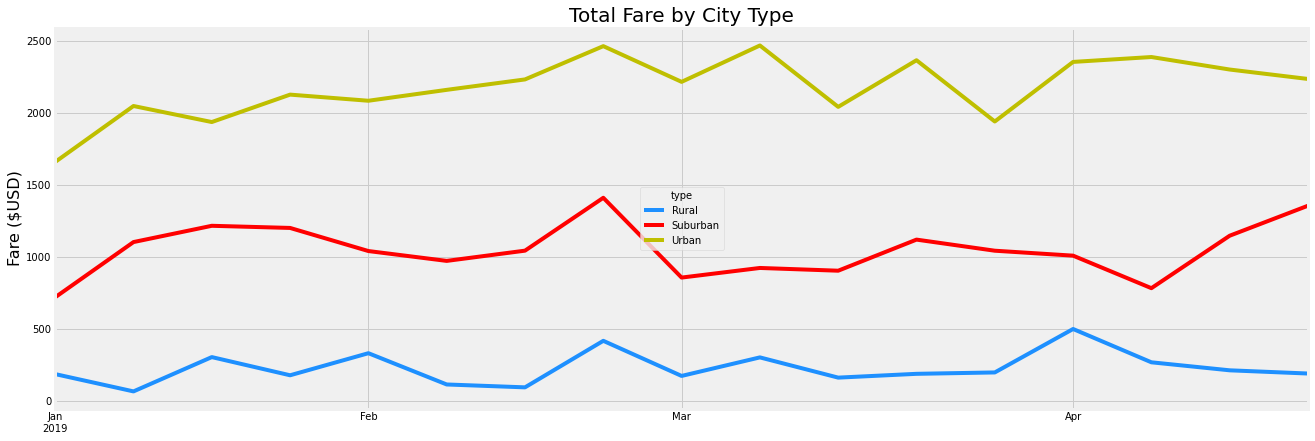

In [90]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig, ax = plt.subplots()
fig = plt.figure(figsize = (20,7))
ax = fare_by_week["Rural"].plot(c = 'dodgerblue', linewidth = 4)
ax = fare_by_week["Suburban"].plot(c = 'red', linewidth = 4)
ax = fare_by_week["Urban"].plot(c = 'y', linewidth = 4)
ax.set_title('Total Fare by City Type', fontsize = 20)
ax.set_ylabel('Fare ($USD)', fontsize = 16)
ax.set_xlabel("")
ax.legend(title = 'type', loc = 'center')
plt.show()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

